## **Importing Required Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv(r"E:\Internship Projects AT\Titanic Survival Classifier\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(df["Survived"].value_counts())
print(df["Survived"].value_counts(normalize = True))

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


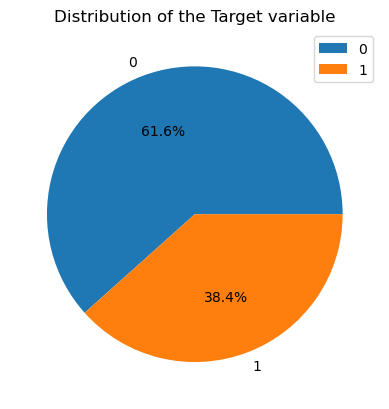

In [6]:
plt.pie(df["Survived"].value_counts(),labels = df["Survived"].value_counts().index,autopct = "%1.1f%%")
plt.title("Distribution of the Target variable")
plt.legend()
plt.show()

In [7]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

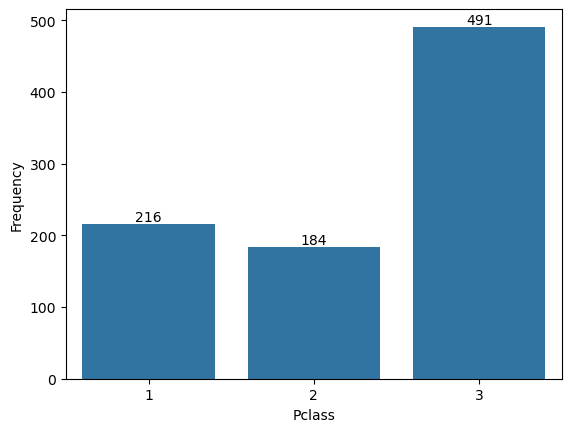

In [8]:
ax = sns.countplot(x = df["Pclass"])
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel("Frequency")
plt.show()

In [9]:
df.groupby(["Pclass"])["Survived"].value_counts(normalize = True).reset_index()

,Pclass,Survived,proportion
0,1,1,0.629630
1,1,0,0.370370
2,2,0,0.527174
3,2,1,0.472826
4,3,0,0.757637
5,3,1,0.242363


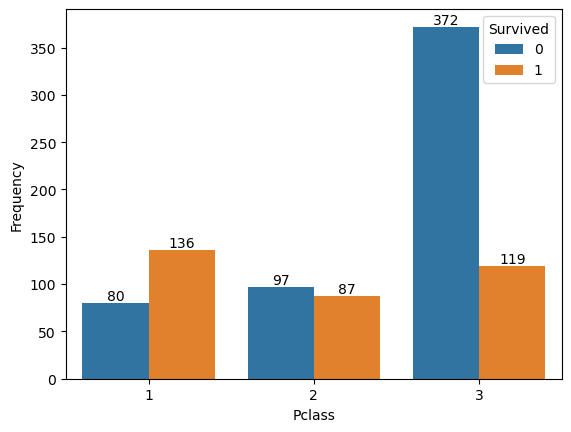

In [10]:
ax = sns.countplot(x = df["Pclass"],hue = df["Survived"])
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel("Frequency")
plt.show()

In [11]:
df.groupby(["Sex"])["Survived"].value_counts(normalize = True).reset_index()

,Sex,Survived,proportion
0,female,1,0.742038
1,female,0,0.257962
2,male,0,0.811092
3,male,1,0.188908


In [12]:
print(df["Sex"].value_counts())
print(df["Sex"].value_counts(normalize = True))

Sex
male      577
female    314
Name: count, dtype: int64
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


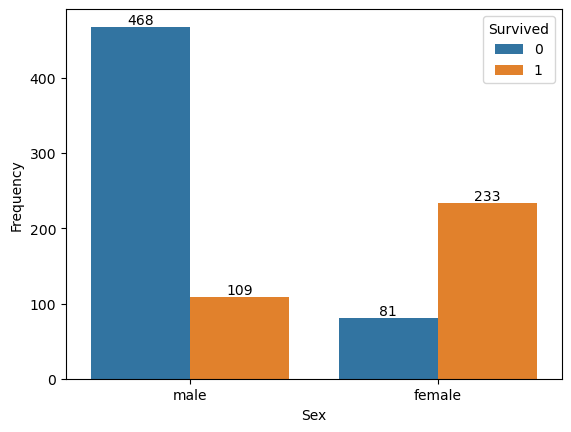

In [13]:
ax = sns.countplot(x = df["Sex"],hue = df["Survived"])
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel("Frequency")
plt.show()

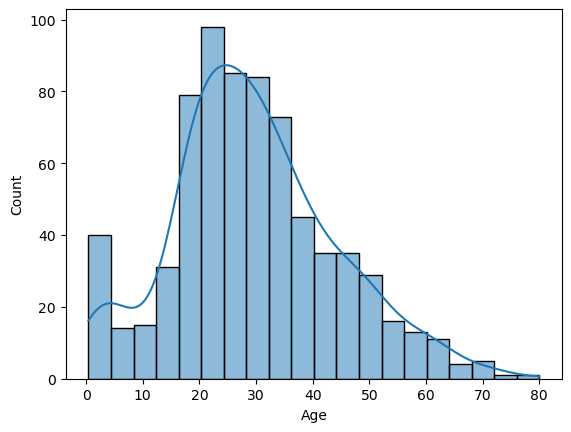

In [14]:
sns.histplot(x = df["Age"] , kde = True)
plt.show()

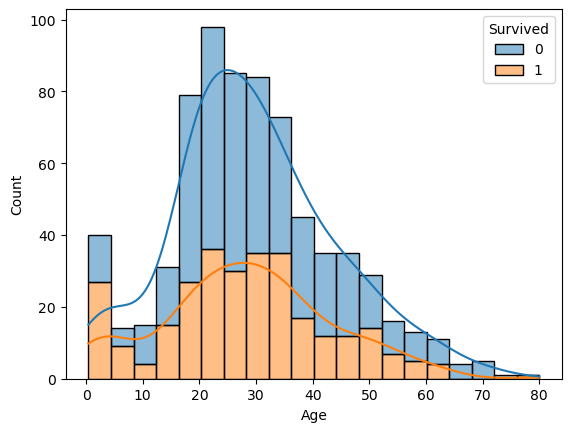

In [15]:
sns.histplot(data=df, x="Age", hue="Survived", kde=True, multiple="stack")
plt.show()

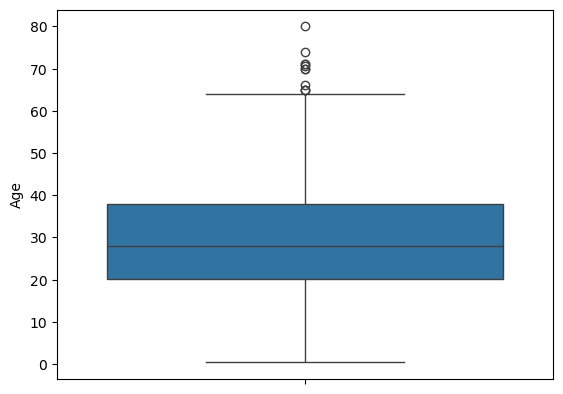

In [16]:
sns.boxplot(y = df["Age"])
plt.show()

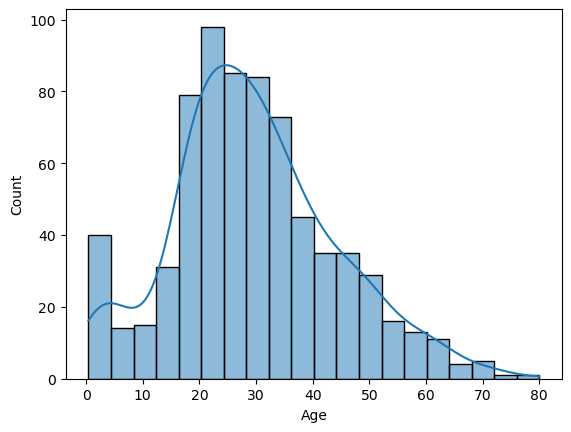

In [17]:
sns.histplot(x = df["Age"].fillna(np.median(df["Age"])) , kde = True)
plt.show()

In [18]:
df["Age"] = df["Age"].replace(np.nan,df["Age"].median())

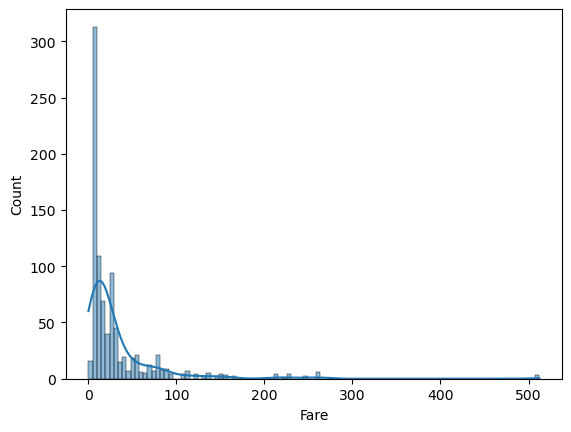

In [19]:
sns.histplot(x = df["Fare"] , kde = True)
plt.show()

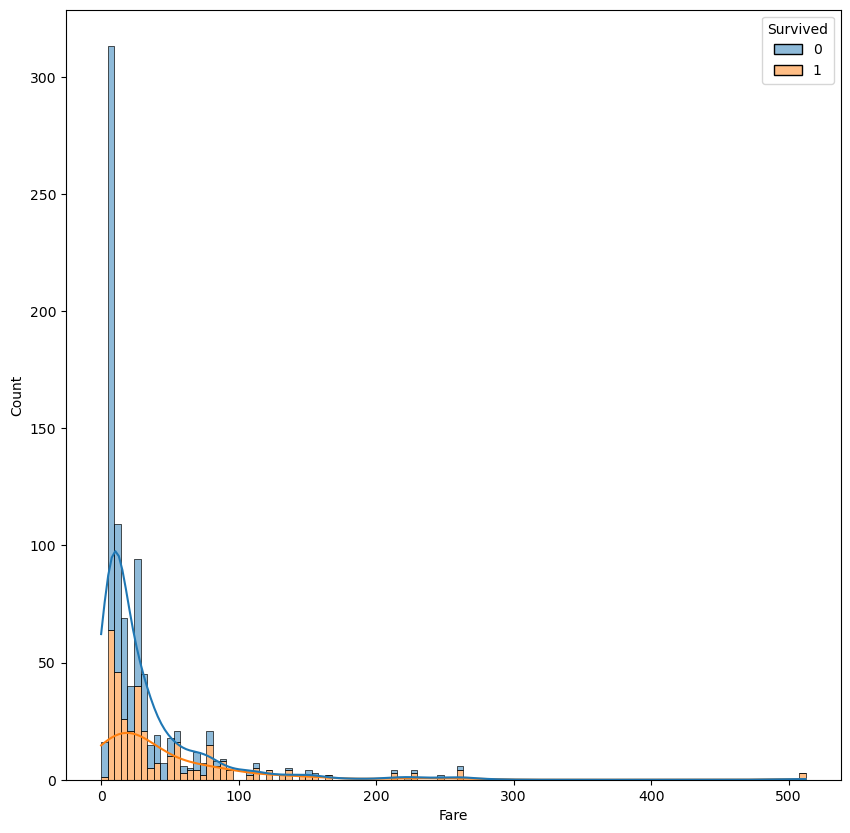

In [20]:
plt.figure(figsize = (10,10))
sns.histplot(data=df, x="Fare", hue="Survived", kde=True, multiple="stack")
plt.show()

In [21]:
df.groupby(["Parch"])["Survived"].value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

In [22]:
df.groupby(["Parch"])["Survived"].value_counts(normalize = True).reset_index()

,Parch,Survived,proportion
0,0,0,0.656342
1,0,1,0.343658
2,1,1,0.550847
3,1,0,0.449153
4,2,0,0.500000
5,2,1,0.500000
6,3,1,0.600000
7,3,0,0.400000
8,4,0,1.000000
9,5,0,0.800000


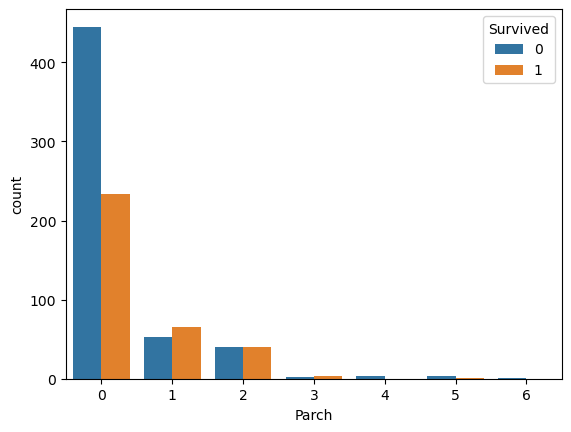

In [23]:
sns.countplot(x = df["Parch"],hue = df["Survived"])
plt.show()

In [24]:
df.groupby(["SibSp"])["Survived"].value_counts(normalize = True).reset_index()

,SibSp,Survived,proportion
0,0,0,0.654605
1,0,1,0.345395
2,1,1,0.535885
3,1,0,0.464115
4,2,0,0.535714
5,2,1,0.464286
6,3,0,0.750000
7,3,1,0.250000
8,4,0,0.833333
9,4,1,0.166667


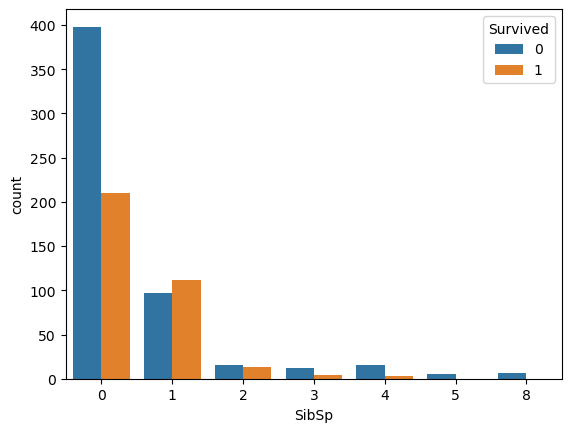

In [25]:
sns.countplot(x = df["SibSp"],hue = df["Survived"])
plt.show()

In [26]:
df.groupby(["Embarked"])["Survived"].value_counts(normalize = True).reset_index()

,Embarked,Survived,proportion
0,C,1,0.553571
1,C,0,0.446429
2,Q,0,0.610390
3,Q,1,0.389610
4,S,0,0.663043
5,S,1,0.336957


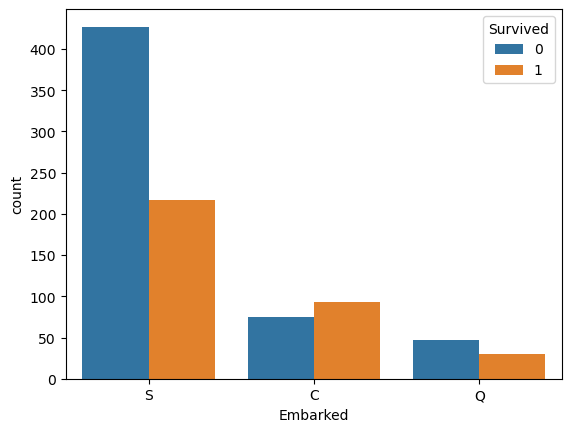

In [27]:
sns.countplot(x = df["Embarked"],hue = df["Survived"])
plt.show()

In [28]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
import warnings
warnings.filterwarnings("ignore")
df["Embarked"].replace(np.nan,"S",inplace = True)

In [30]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [31]:
df.drop("Cabin",axis = 1,inplace = True)

In [32]:
df.drop(["Name","PassengerId"],axis = 1,inplace = True)

In [33]:
df.drop(["Ticket"],axis = 1,inplace = True)

In [34]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [35]:
df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
108,0,3,male,38.0,0,0,7.8958,S
88,1,1,female,23.0,3,2,263.0000,S
245,0,1,male,44.0,2,0,90.0000,Q


In [36]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [37]:
dummies = pd.get_dummies(df[["Sex", "Embarked"]], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop(["Sex", "Embarked"], axis=1, inplace=True)

In [38]:
pclass_dummies = pd.get_dummies(df["Pclass"], prefix="Pclass", drop_first=True)
df = pd.concat([df, pclass_dummies], axis=1)
df.drop("Pclass", axis=1, inplace=True)

In [39]:
df.sample(3)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
273,0,37.0,0,1,29.7000,True,False,False,False,False
625,0,61.0,0,0,32.3208,True,False,True,False,False
130,0,33.0,0,0,7.8958,True,False,False,False,True


In [40]:
df = df.astype(float)

In [41]:
df.sample(3)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
717,1.0,27.00,0.0,0.0,10.5000,0.0,0.0,1.0,1.0,0.0
803,1.0,0.42,0.0,1.0,8.5167,1.0,0.0,0.0,0.0,1.0
845,0.0,42.00,0.0,0.0,7.5500,1.0,0.0,1.0,0.0,1.0


In [42]:
x1 = df.drop("Survived",axis = 1)
y = df["Survived"]

In [43]:
scaler = StandardScaler()
x =  scaler.fit_transform(x1)

In [44]:
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state = 42,test_size = 0.2,stratify = y)

In [45]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

results = []
for name, model in models.items():
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Test Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Test Accuracy', ascending=False))

                 Model  CV Mean Accuracy    CV Std  Test Accuracy
6              XGBoost          0.789412  0.036847       0.821229
2        Random Forest          0.797882  0.052609       0.815642
1        Decision Tree          0.762740  0.042279       0.815642
4                  KNN          0.803418  0.024378       0.810056
3                  SVM          0.837112  0.022150       0.810056
0  Logistic Regression          0.796395  0.017727       0.804469
5    Gradient Boosting          0.820319  0.031029       0.793296


In [46]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

param_grids = {
    'Logistic Regression': 
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
     'penalty': ['l1', 'l2'],
     'solver': ['liblinear']},
    'Decision Tree': 
    {'max_depth': [None, 5, 10, 20], 
     'min_samples_split': [2, 5, 10], 
     'min_samples_leaf': [1, 2, 4]},
    'Random Forest': 
    {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'SVM': 
    {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']},
    'KNN': 
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    'Gradient Boosting': 
    {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGBoost': 
    {'n_estimators': [100, 200, 300], 'max_depth': [3, 6, 9], 'learning_rate': [0.01, 0.1, 0.2]}
}

tuned_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    tuned_models[name] = grid_search.best_estimator_
    print(f"{name} best params: {grid_search.best_params_}")

results = []
for name, model in tuned_models.items():
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Test Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Test Accuracy', ascending=False))

Logistic Regression best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Decision Tree best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Random Forest best params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
SVM best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
KNN best params: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Gradient Boosting best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
XGBoost best params: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200}
                 Model  CV Mean Accuracy    CV Std  Test Accuracy
2        Random Forest          0.838609  0.040374       0.810056
5    Gradient Boosting          0.823166  0.038668       0.810056
3                  SVM          0.838521  0.022825       0.810056
1        Decision Tree          0.813306  0.040506       0.798883
0  Logistic Regression          0.799212  0.023221       0.798883
4                  KNN          0.817492

In [47]:
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=10, random_state=42),
    'SVM': SVC(C=1, gamma=0.1, kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=9, p=1, weights='uniform'),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, n_estimators=300, max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(learning_rate=0.01, n_estimators=200, max_depth=9, random_state=42, eval_metric='logloss')
}

results = []
for name, model in models.items():
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'CV Mean Accuracy': round(cv_scores.mean(), 4),
        'CV Std': round(cv_scores.std(), 4),
        'Test Accuracy': round(accuracy, 4)
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Test Accuracy', ascending=False))

                 Model  CV Mean Accuracy  CV Std  Test Accuracy
2        Random Forest            0.8386  0.0404         0.8101
5    Gradient Boosting            0.8232  0.0387         0.8101
3                  SVM            0.8385  0.0228         0.8101
1        Decision Tree            0.8133  0.0405         0.7989
0  Logistic Regression            0.7992  0.0232         0.7989
4                  KNN            0.8175  0.0343         0.7877
6              XGBoost            0.8301  0.0325         0.7821


## **Final Model**

Important features


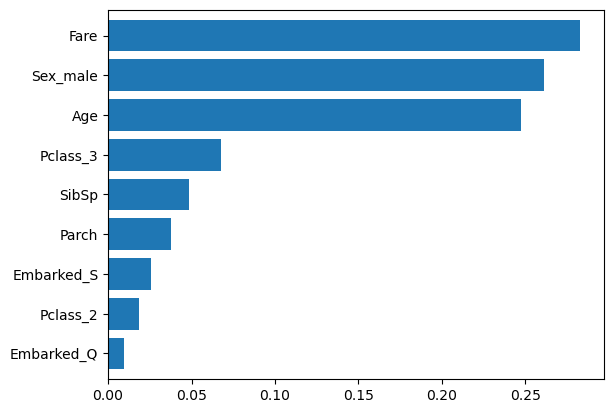

____________________________________________________________
82
98


In [48]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(x_train, y_train)
Y_pred_rf = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100)
acc_random_forest1 = round(random_forest.score(x_train, y_train) * 100)
print("Important features")
pd.Series(random_forest.feature_importances_,x1.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.show()
print('__'*30)
print("Test Accuracy : ",acc_random_forest)
print("Train Accuracy : "acc_random_forest1)

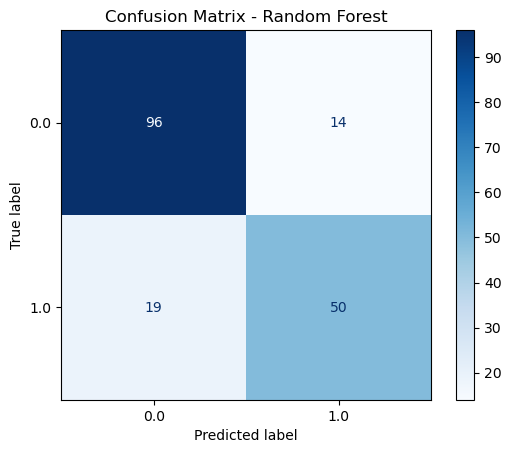

In [52]:
cm = confusion_matrix(y_test, Y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()